In [1]:
from stompy.model.suntans import sun_driver
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
model=sun_driver.SuntansModel.load("/opt2/sfb_ocean/suntans/runs/merged_020_20180307")

In [3]:
model.load_bc_ds()
bc_ds=model.bc_ds

In [4]:
bc_ds

<xarray.Dataset>
Dimensions:      (Nk: 60, Npoint: 3, Nseg: 83, Nt: 7418, Ntype2: 366, Ntype3: 10)
Dimensions without coordinates: Nk, Npoint, Nseg, Nt, Ntype2, Ntype3
Data variables:
    z            (Nk) float64 ...
    time         (Nt) datetime64[ns] ...
    cellp        (Ntype3) int32 ...
    xv           (Ntype3) float64 ...
    yv           (Ntype3) float64 ...
    uc           (Nt, Nk, Ntype3) float64 ...
    vc           (Nt, Nk, Ntype3) float64 ...
    wc           (Nt, Nk, Ntype3) float64 ...
    T            (Nt, Nk, Ntype3) float64 ...
    S            (Nt, Nk, Ntype3) float64 ...
    h            (Nt, Ntype3) float64 ...
    edgep        (Ntype2) int32 ...
    xe           (Ntype2) float64 ...
    ye           (Ntype2) float64 ...
    boundary_h   (Nt, Ntype2) float64 ...
    boundary_u   (Nt, Nk, Ntype2) float64 ...
    boundary_v   (Nt, Nk, Ntype2) float64 ...
    boundary_w   (Nt, Nk, Ntype2) float64 ...
    boundary_T   (Nt, Nk, Ntype2) float64 ...
    boundary_S   (N

In [5]:
bc_ds.seg_name[1].item()

'SJRiver'

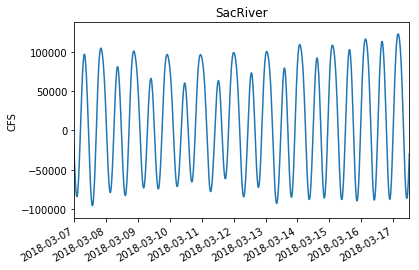

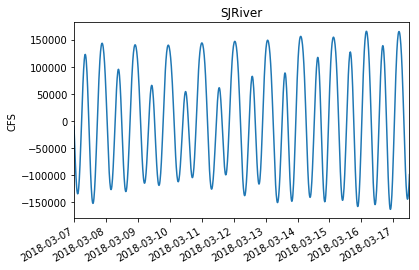

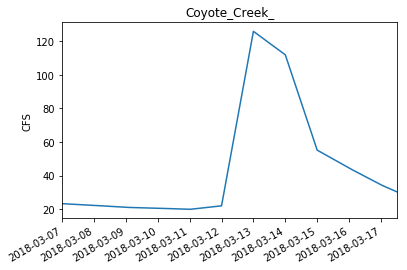

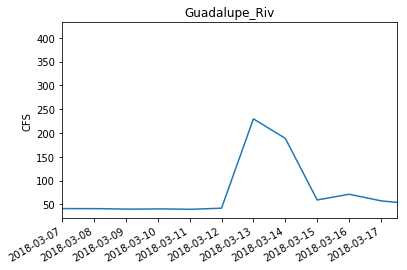

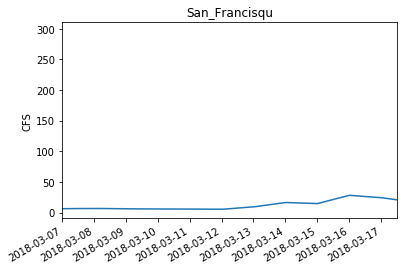

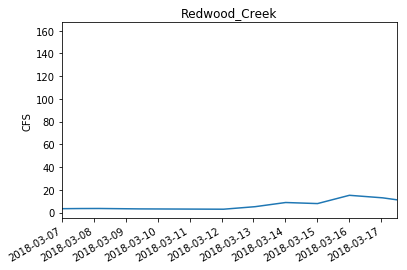

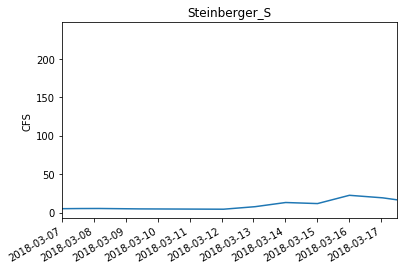

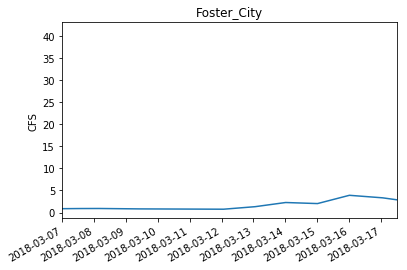

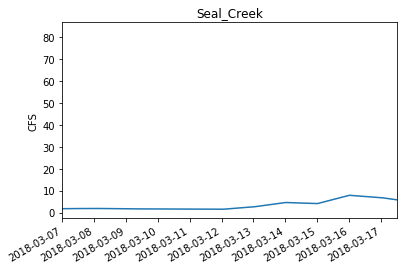

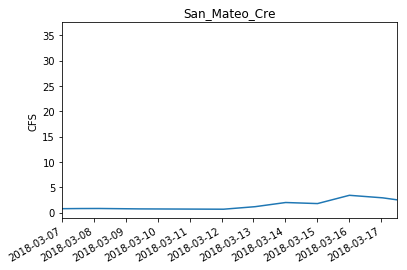

In [6]:
for nseg in bc_ds.Nseg[:10]:
    fig=plt.figure()
    # Plot as CFS for easier comparison to USGS plots
    name=bc_ds.seg_name[nseg].item()
    plt.plot(bc_ds.time, 35.3* bc_ds.boundary_Q.isel(Nseg=nseg), label=name)
    plt.title(name)
    plt.axis(xmin=model.run_start,xmax=model.run_stop)
    plt.ylabel('CFS')
    fig.autofmt_xdate()

In [9]:
Qsac=bc_ds.boundary_Q.isel(Nseg=0).values
import scipy.signal
win=scipy.signal.windows.hamming(len(Qsac))

In [11]:
mean_no_alias=(win*Qsac).sum()/ win.sum()
mean_no_alias

-2051.8939280978802

In [12]:
from stompy.io.local import usgs_nwis

In [14]:
ds=usgs_nwis.nwis_dataset(11455420,
                          start_date=model.run_start,
                          end_date=model.run_stop,
                          products=[60],cache_dir='.')

INFO:usgs_nwis:Cached   2018-03-01 00:00:00 -- 2018-04-01 00:00:00


(736760.0, 736770.5, -111580.34163388223, 137300.48317407529)

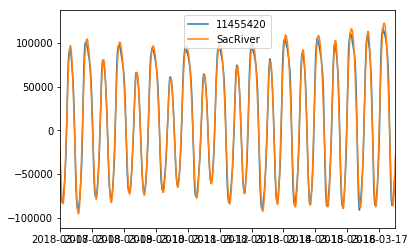

In [17]:
plt.figure()
plt.plot(ds.time,ds.stream_flow_mean_daily,label='11455420')

nseg=0
name=bc_ds.seg_name[nseg].item()
plt.plot(bc_ds.time, 35.3*bc_ds.boundary_Q.isel(Nseg=nseg), label=name)
plt.legend()

plt.axis(xmin=model.run_start,xmax=model.run_stop)

In [19]:
bc_ds.time[-10:]

<xarray.DataArray 'time' (Nt: 10)>
array(['2040-12-16T00:00:00.000000000', '2040-12-17T00:00:00.000000000',
       '2040-12-18T00:00:00.000000000', '2040-12-19T00:00:00.000000000',
       '2040-12-20T00:00:00.000000000', '2040-12-21T00:00:00.000000000',
       '2040-12-22T00:00:00.000000000', '2040-12-23T00:00:00.000000000',
       '2040-12-24T00:00:00.000000000', '2040-12-25T00:00:00.000000000'],
      dtype='datetime64[ns]')
Dimensions without coordinates: Nt